# Introducción

En este laboratorio se realizará una exploración sobre el dataset [We are from our childhood](https://www.kaggle.com/jkokatjuhha/we-are-from-our-childhood/notebook). El objetivo de este 
dataset es evaluar diferencias y similitudes entre personas que se han criado en zonas rurales o en la ciudad.
La muestra se tomo entre personas habitantes de Eslovaquia de ambo sexos, de entre 15 y 30 años de edad.

Consideraciones del dataset:
* El dataset esta formado por 1010 filas y 150 colunas (139 números enteros y 11 categoricas).
* Los datos contienen valores NaN.
* Por conveniencia los nombres de las columnas han sido acortados, los nombres completos se encuentran en *columns.csv*.


Puede encontrar mayor información sobre este dataset [aquí](https://www.kaggle.com/jkokatjuhha/we-are-from-our-childhood/data).

## Desarrollo
### Estadísticas descriptivas

* Calcular estadísticos como la moda, media, mediana y desviación estándar del peso y de la edad. ¿Responden a alguna distribución conocida?


* **Peso Media: 66.43**
* **Peso Mediana: 64.00**
* **Peso Moda: 60.00**
* **Peso Desv. Std: 13.85**


* **Edad Media: 20**
* **Edad Mediana: 20**
* **Edad Moda: 19**
* **Edad Desv. Std: 2.84**

**Los valores de media, mediana y moda estan muy próximos entre si lo cual nos hace suponer que responden a una distribución normal. La diferencia númerica que existe entre estos 3 estadisticos puede ser atribuible al tamaño de la muestra (1010 individuos).**

* Realizar un análisis de outliers.
* Explicar cómo varían las métricas cuando desglosamos por género. ¿Responden a alguna distribución conocida? Comparar cualitativamente y gráficamente ambas distribuciones. Calcular la correlación entre todas estas variables y mostrarla con un gráfico conjunto.


In [61]:
%matplotlib inline

import pandas as pd
import seaborn as sns


sns.set_style("whitegrid")

pd.set_option('display.max_columns',150) # Para poder visualizar todas las columnas

dataset = pd.read_csv("./datasets/responses.csv", sep=",")

# Visualizamos la table
dataset[:10]



,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,Reading,Geography,Foreign languages,Medicine,Law,Cars,Art exhibitions,Religion,"Countryside, outdoors",Dancing,Musical instruments,Writing,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous dogs,Fear of public speaking,Smoking,Alcohol,Healthy eating,Daily events,Prioritising workload,Writing notes,Workaholism,Thinking ahead,Final judgement,Reliability,Keeping promises,Loss of interest,Friends versus money,Funniness,Fake,Criminal damage,Decision making,Elections,Self-criticism,Judgment calls,Hypochondria,Empathy,Eating to survive,Giving,Compassion to animals,Borrowed stuff,Loneliness,Cheating in school,Health,Changing the past,God,Dreams,Charity,Number of friends,Punctuality,Lying,Waiting,New environment,Mood swings,Appearence and gestures,Socializing,Achievements,Responding to a serious letter,Children,Assertiveness,Getting angry,Knowing the right people,Public speaking,Unpopularity,Life struggles,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Internet usage,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,3.0,1.0,2.0,1.0,5.0,1.0,3.0,3.0,5.0,3.0,5.0,3.0,3.0,3.0,3.0,5.0,3.0,1.0,1.0,1.0,1.0,5.0,3.0,3.0,2.0,1.0,5.0,5.0,1.0,4.0,4.0,2.0,5.0,4.0,4.0,1.0,1.0,1.0,1.0,1.0,5,3.0,1.0,3.0,2.0,never smoked,drink a lot,4.0,2.0,2.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,3.0,5.0,1.0,1.0,3.0,4.0,1.0,3.0,1.0,3.0,1,4.0,5.0,4.0,3.0,2.0,1.0,1.0,1.0,4,2.0,3,i am always on time,never,3.0,4.0,3.0,4.0,3.0,4.0,3.0,5.0,1.0,1.0,3.0,5.0,5.0,1.0,4.0,5.0,1.0,4.0,3.0,2.0,3.0,4.0,3.0,few hours a day,3.0,4.0,5.0,3.0,3.0,1,3.0,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,4.0,1.0,3.0,1.0,4.0,4.0,2.0,1.0,1.0,5.0,2.0,2.0,4.0,3.0,4.0,1.0,3.0,5.0,4.0,1.0,4.0,1.0,3.0,4.0,5.0,2.0,4.0,4.0,5.0,1.0,1.0,4.0,4.0,5.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,3.0,2.0,4.0,2.0,5.0,1.0,1.0,1.0,2.0,1.0,1,1.0,3.0,1.0,4.0,never smoked,drink a lot,3.0,3.0,2.0,4.0,5.0,4.0,1.0,4.0,4.0,3.0,4.0,3.0,2.0,1.0,2.0,5.0,4.0,4.0,1.0,2.0,1,2.0,4.0,3.0,2.0,4.0,4.0,4.0,1.0,3,1.0,3,i am often early,sometimes,3.0,4.0,4.0,4.0,4.0,2.0,4.0,2.0,2.0,5.0,4.0,4.0,4.0,1.0,4.0,3.0,5.0,3.0,4.0,5.0,3.0,2.0,3.0,few hours a day,3.0,4.0,1.0,4.0,2.0,5,2.0,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,4.0,1.0,4.0,3.0,5.0,5.0,5.0,1.0,3.0,5.0,3.0,4.0,4.0,2.0,4.0,2.0,5.0,5.0,2.0,2.0,1.0,1.0,2.0,1.0,5.0,2.0,4.0,2.0,4.0,1.0,1.0,5.0,2.0,5.0,2.0,3.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,2.0,1.0,1.0,4.0,2.0,5.0,5.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,1,1.0,1.0,1.0,2.0,tried smoking,drink a lot,3.0,1.0,2.0,5.0,3.0,5.0,3.0,4.0,5.0,1.0,5.0,2.0,4.0,1.0,3.0,5.0,4.0,4.0,1.0,5.0,5,5.0,4.0,2.0,5.0,3.0,2.0,5.0,5.0,1,3.0,3,i am often running late,sometimes,2.0,3.0,4.0,3.0,5.0,3.0,4.0,4.0,3.0,4.0,3.0,2.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,4.0,5.0,3.0,1.0,few hours a day,2.0,4.0,1.0,4.0,3.0,4,2.0,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,4.0,2.0

In [58]:
#Calcular estadísticos como la moda, media, mediana y desviación estándar del peso y de la edad. 
#¿Responden a alguna distribución conocida?

dataset_peso = dataset.dropna(subset=["Age"])
dataset_edad = dataset.dropna(subset=["Weight"])

peso_media = dataset_peso["Weight"].mean()
peso_mediana = dataset_peso["Weight"].median()
peso_moda = dataset_peso["Weight"].mode()
peso_std = dataset_peso["Weight"].std()

edad_media = dataset_edad["Age"].mean()
edad_mediana = dataset_edad["Age"].median()
edad_moda = dataset_edad["Age"].mode()
edad_std = dataset_edad["Age"].std()



print("""
   Peso Media: %.2f
   Peso Mediana: %.2f
   Peso Moda: %.2f
   Peso Desv. Std: %.2f\n
   Edad Media: %2.f
   Edad Mediana: %d
   Edad Moda: %d
   Edad Desv. Std: %.2f
""" % (peso_media,peso_mediana,peso_moda, peso_std, edad_media,edad_mediana,edad_moda, edad_std))


   Peso Media: 66.43
   Peso Mediana: 64.00
   Peso Moda: 60.00
   Peso Desv. Std: 13.85

   Edad Media: 20
   Edad Mediana: 20
   Edad Moda: 19
   Edad Desv. Std: 2.84



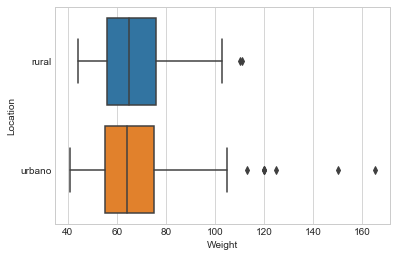

In [59]:
dataset_peso_rural = dataset_peso.loc[dataset_peso["Village - town"]=="village"].assign(Location="rural")
#dataset_edad_rural = dataset_edad.loc[dataset_edad["Village - town"]=="village"].assign(Location="rural")
dataset_peso_urbano = dataset_peso.loc[dataset_peso["Village - town"]=="city"].assign(Location="urbano")
#dataset_edad_urbano = dataset_edad.loc[dataset_edad["Village - town"]=="city"].assign(Location="urbano")

dataset_peso_rural_urbano = pd.concat([dataset_peso_rural, dataset_peso_urbano])



sns.boxplot(x="Weight", y="Location", data=dataset_peso_rural_urbano);


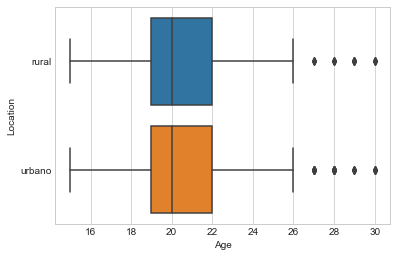

In [60]:
dataset_edad_rural = dataset_edad.loc[dataset_edad["Village - town"]=="village"].assign(Location="rural")
dataset_edad_urbano = dataset_edad.loc[dataset_edad["Village - town"]=="city"].assign(Location="urbano")

dataset_edad_rural_urbano = pd.concat([dataset_peso_rural, dataset_peso_urbano])

sns.boxplot(x="Age", y="Location", data=dataset_edad_rural_urbano);
